In [1]:
import numpy as np
import pandas as pd
import sys

In [2]:
sys.path.append('../../nuclearpy_models/')

In [3]:
from models.BE import dz_be, semf_be
from utils.metrics import RegressionMetrics

In [4]:
exp_df = pd.read_csv('../../Data/Experimental/be_exp.csv', delimiter=',')


## Inference

In [5]:
np.zeros((9, 2, 2), order="F").shape

(9, 2, 2)

In [6]:
dz_be(12, 10)

/Users/jose/Documents/Works/MIT/AI/PyMassModels/notebooks/test/../../nuclearpy_models/models/BE/dz_10.py:95: RuntimeWarning: invalid value encountered in scalar divide
  onp[ip, 0, I3] += noc[i - 1, I3] / fact  # for FM term
/Users/jose/Documents/Works/MIT/AI/PyMassModels/notebooks/test/../../nuclearpy_models/models/BE/dz_10.py:95: RuntimeWarning: divide by zero encountered in scalar divide
  onp[ip, 0, I3] += noc[i - 1, I3] / fact  # for FM term


171.1941863794075

In [7]:
exp_df.sample()[['N', 'Z', 'BE']]

,N,Z,BE
3017,89,70,1284.40836


In [8]:
exp_df["semf_pred"] = exp_df.apply(lambda x: semf_be(x["Z"], x["N"]), axis=1)
exp_df["dz_pred"] = exp_df.apply(lambda x: dz_be(x["Z"], x["N"]), axis=1)

/Users/jose/Documents/Works/MIT/AI/PyMassModels/notebooks/test/../../nuclearpy_models/models/BE/dz_10.py:95: RuntimeWarning: invalid value encountered in scalar divide
  onp[ip, 0, I3] += noc[i - 1, I3] / fact  # for FM term
/Users/jose/Documents/Works/MIT/AI/PyMassModels/notebooks/test/../../nuclearpy_models/models/BE/dz_10.py:95: RuntimeWarning: divide by zero encountered in scalar divide
  onp[ip, 0, I3] += noc[i - 1, I3] / fact  # for FM term


# Regression Metrics

In [9]:
semf_metrics = RegressionMetrics(exp_df["BE"], exp_df["semf_pred"], "SEMF")()
dz_metrics = RegressionMetrics(exp_df["BE"], exp_df["dz_pred"], "DZ")()
pd.concat([semf_metrics, dz_metrics], axis=0)

,R2,MSE,RMSE,MAE,MAPE,RMSPE,Max Error,Explained Variance Score
SEMF,0.999916,17.463550,4.178941,2.978731,0.401497,0.873391,20.136952,0.999918
DZ,0.560022,91849.633603,303.067045,277.367786,24.314167,24.543024,533.322768,0.928493


In [10]:
(np.abs(exp_df["BE"] - exp_df["dz_pred"]) < np.abs(exp_df["BE"] - exp_df["semf_pred"])).sum()

4

In [11]:
import seaborn as sns

<Axes: xlabel='N', ylabel='Z'>

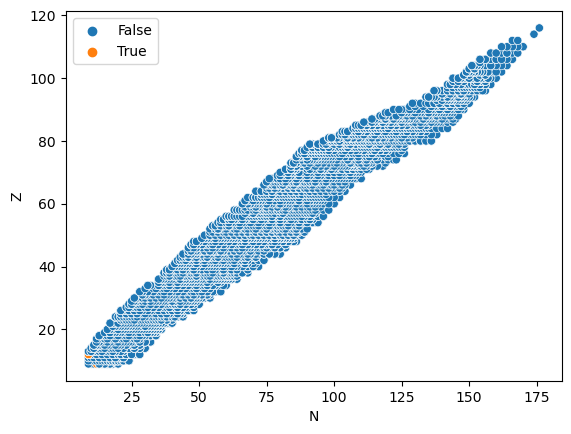

In [12]:
sns.scatterplot(x="N", y="Z", data=exp_df, hue=(np.abs(exp_df["BE"] - exp_df["dz_pred"]) < np.abs(exp_df["BE"] - exp_df["semf_pred"])))